# Delay-and-sum (DAS) plane wave imaging

In this notebook, we shown a simple example of DAS imaging from a plane wave insonification, using utility functions for this project.

The data used in this example is from [PICMUS 2016](https://www.creatis.insa-lyon.fr/Challenge/IEEE_IUS_2016/). It can download at this [link](https://www.creatis.insa-lyon.fr/Challenge/IEEE_IUS_2016/download) by selecting the option 'Link to dataset'. The file for this example is under: 'database/experiments/resolution_distortion'. Feel free to change the input file with the template below!

We first import the necessary function and the data.

In [1]:
import numpy as np
import sys, h5py, os

sys.path.append('..')

import plot_settings
from frius import find_nearest, distance2time, time2distance, das_beamform, image_bf_data

# import recording
file_path = os.path.join('..', 'data', 'resolution_distortion_expe_dataset_rf.h5')
try:
    dataset = h5py.File(file_path,'r')
except:
    raise ValueError("Missing data!"
    " Download from [https://www.creatis.insa-lyon.fr/Challenge/IEEE_IUS_2016/download] by selecting"
    " the option 'Link to dataset'. The file for this example is under: 'database/experiments/resolution_distortion'.")

We then extract the necessary parameters to form the B-mode image.

In [2]:
# extract necessary parameters
data = np.array(dataset.get('data'))
normal_inci_idx = find_nearest(np.array(dataset.get('angles')), 0)[1]   # get normal incidence recording
rf_data = np.real(data[normal_inci_idx])
n_samples = rf_data.shape[1]
n_elements = rf_data.shape[0]

# transmit pulse info: https://www.creatis.insa-lyon.fr/Challenge/IEEE_IUS_2016/transmit_pulse
center_freq = 5.208e6

samp_freq = np.array(dataset.get('sampling_frequency'))
probe_geometry = np.array(dataset.get('probe_geometry'))
pitch = probe_geometry[1]-probe_geometry[0]
speed_sound = np.array(dataset.get('sound_speed'))

min_depth_data = np.array(dataset.get('min_depth'))
time_vec = np.arange(n_samples) / samp_freq
max_depth = time2distance(time_vec[-1], speed_sound)

We can use the following function to beamform the received data from a plane wave insonification of normal incidence. Note that no apodization is used for the function below!

In [3]:
# beamform image
beamformed_data, time_samples, lateral_pos = das_beamform(rf_data, samp_freq, pitch, probe_geometry, 
                                                        center_freq, speed_sound)

And finally we can display the image :)

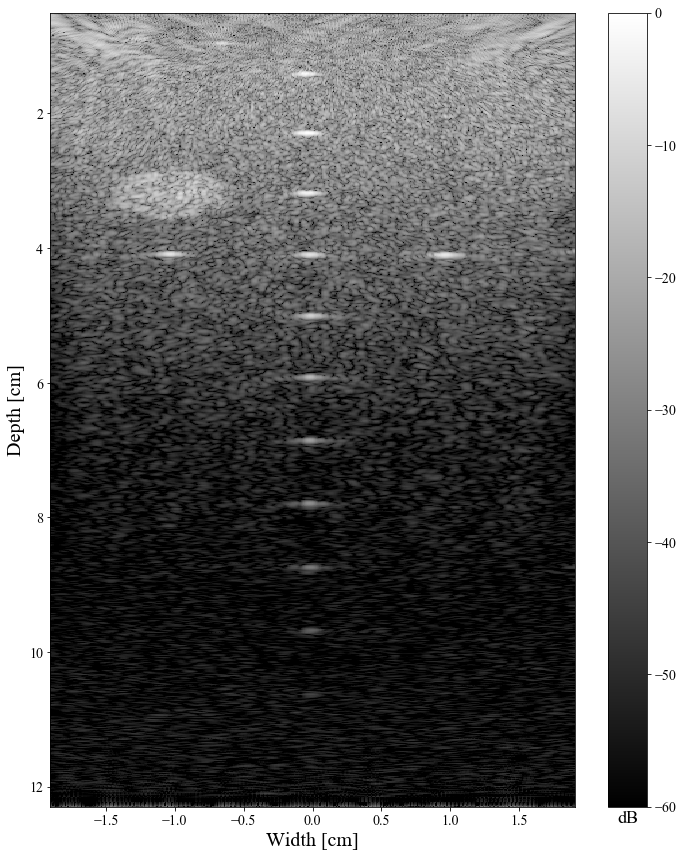

In [4]:
image_bf_data(beamformed_data, probe_geometry, max_depth=max_depth, min_depth=min_depth_data, 
              scal_fact=1e2, figsize=(10,12))
plt.ylabel("Depth [cm]")
plt.xlabel("Width [cm]");